In [1]:
import imp
import os

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly

from BuildingControlSimulator.Simulator.Simulation import Simulation
from BuildingControlSimulator.BuildingModels.IDFPreprocessor import IDFPreprocessor
from BuildingControlSimulator.BuildingModels.EnergyPlusBuildingModel import EnergyPlusBuildingModel
from BuildingControlSimulator.ControlModels.Deadband import Deadband

plotly.offline.init_notebook_mode(connected=True)
%load_ext autoreload
%autoreload 2

In [2]:
s = Simulation(
    building_model=EnergyPlusBuildingModel(
        idf=IDFPreprocessor(
            idf_name="SF+CZ2B+USA_AZ_Phoenix-Sky.Harbor.Intl.AP.722780+gasfurnace+crawlspace+IECC_2018.idf",
            init_temperature=21.),
        weather_name="USA_AZ_Phoenix-Sky.Harbor.Intl.AP.722780_TMY3.epw"
    ),
    controller=Deadband(deadband=2., stp_heat=21., stp_cool=24.),
    step_size_minutes=5,
    start_time_days = 204,
    final_time_days = 209,
)

2020-05-06 03:55:51 INFO     IDFPreprocessor loading .idf file: /home/bcs/lib/building-control-simulator/idf/v8-9-0/SF+CZ2B+USA_AZ_Phoenix-Sky.Harbor.Intl.AP.722780+gasfurnace+crawlspace+IECC_2018.idf


In [3]:
%time s.initialize()

2020-05-06 03:55:53 INFO     Upgrading idf file. cur_version=8-6-0, target_version=8-9-0, transistion_path=/home/bcs/lib/external/EnergyPlus/EnergyPlus-8-9-0/PreProcess/IDFVersionUpdater/Transition-V8-6-0-to-V8-7-0
2020-05-06 03:55:59 INFO     Upgrading idf file. cur_version=8-7-0, target_version=8-9-0, transistion_path=/home/bcs/lib/external/EnergyPlus/EnergyPlus-8-9-0/PreProcess/IDFVersionUpdater/Transition-V8-7-0-to-V8-8-0
2020-05-06 03:56:05 INFO     Upgrading idf file. cur_version=8-8-0, target_version=8-9-0, transistion_path=/home/bcs/lib/external/EnergyPlus/EnergyPlus-8-9-0/PreProcess/IDFVersionUpdater/Transition-V8-8-0-to-V8-9-0
2020-05-06 03:56:11 INFO     Upgrading complete. Using: /home/bcs/lib/building-control-simulator/idf/v8-9-0/SF+CZ2B+USA_AZ_Phoenix-Sky.Harbor.Intl.AP.722780+gasfurnace+crawlspace+IECC_2018_8-9-0.idf
2020-05-06 03:56:11 INFO     Expanding objects. Using: /home/bcs/lib/building-control-simulator/idf/v8-9-0/SF+CZ2B+USA_AZ_Phoenix-Sky.Harbor.Intl.AP.722780+

CPU times: user 466 ms, sys: 151 ms, total: 617 ms
Wall time: 40.2 s


In [4]:
%time output_df = s.run()

CPU times: user 766 ms, sys: 84.9 ms, total: 850 ms
Wall time: 2.26 s


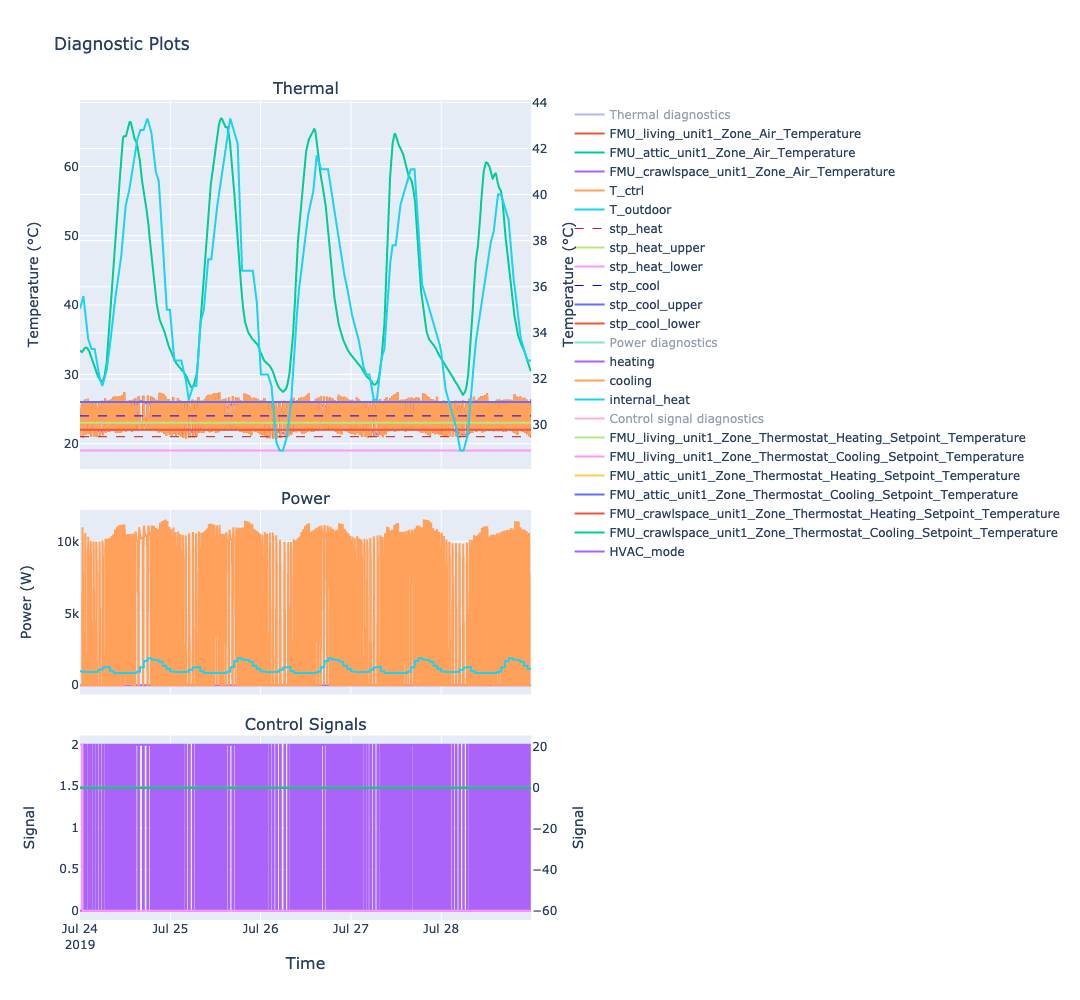

CPU times: user 2.43 s, sys: 288 ms, total: 2.72 s
Wall time: 2.74 s


In [5]:
%time s.show_plots()

In [6]:
output_df

,time_seconds,step_status,t_ctrl,HVAC_mode,stp_heat,stp_cool,deadband,FMU_T_heating_stp,FMU_T_cooling_stp,FMU_T_control_type,...,FMU_crawlspace_unit1_Zone_Air_Temperature,FMU_crawlspace_unit1_Zone_Thermostat_Heating_Setpoint_Temperature,FMU_crawlspace_unit1_Zone_Thermostat_Cooling_Setpoint_Temperature,FMU_crawlspace_unit1_Zone_Air_System_Sensible_Heating_Rate,FMU_crawlspace_unit1_Zone_Air_System_Sensible_Cooling_Rate,FMU_crawlspace_unit1_Zone_Total_Internal_Total_Heating_Rate,datetime,total_heating,total_cooling,total_internal_gains
0,17625600,0,21.000000,0,21.0,24.0,2.0,0.0,0.0,0.0,...,23.193369,0.0,0.0,0.0,0.0,0.0,2019-07-24 00:00:00,0.0,0.000000,972.807796
1,17625900,0,21.851192,0,21.0,24.0,2.0,0.0,0.0,0.0,...,23.165176,0.0,0.0,0.0,0.0,0.0,2019-07-24 00:05:00,0.0,0.000000,972.807796
2,17626200,0,22.422904,0,21.0,24.0,2.0,0.0,0.0,0.0,...,23.142691,0.0,0.0,0.0,0.0,0.0,2019-07-24 00:10:00,0.0,0.000000,972.807796
3,17626500,0,22.901144,0,21.0,24.0,2.0,0.0,0.0,0.0,...,23.111295,0.0,0.0,0.0,0.0,0.0,2019-07-24 00:15:00,0.0,0.000000,972.807796
4,17626800,0,23.818305,0,21.0,24.0,2.0,0.0,0.0,0.0,...,23.094467,0.0,0.0,0.0,0.0,0.0,2019-07-24 00:20:00,0.0,0.000000,972.807796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,18056100,0,24.986444,0,21.0,24.0,2.0,0.0,0.0,0.0,...,21.952552,0.0,0.0,0.0,0.0,0.0,2019-07-28 23:35:00,0.0,0.000000,1142.401706
1436,18056400,0,25.630698,0,21.0,24.0,2.0,0.0,0.0,0.0,...,21.952392,0.0,0.0,0.0,0.0,0.0,2019-07-28 23:40:00,0.0,0.000000,1142.401706
1437,18056700,0,25.689917,0,21.0,24.0,2.0,0.0,0.0,0.0,...,21.952627,0.0,0.0,0.0,0.0,0.0,2019-07-28 23:45:00,0.0,0.000000,1142.401706
1438,18057000,0,25.885731,0,21.0,24.0,2.0,0.0,0.0,0.0,...,21.954496,0.0,0.0,0.0,0.0,0.0,2019-07-28 23:50:00,0.0,0.000000,1142.401706


mean HVAC cycle length: 1235.9375


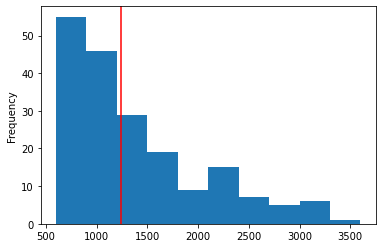

In [7]:
hvac_df = output_df[["time_seconds", "HVAC_mode"]].copy(deep=True)
hvac_df["HVAC_mode_prev"] = hvac_df.HVAC_mode.shift(periods=1)
hvac_mode_changes = hvac_df[hvac_df.HVAC_mode_prev != hvac_df.HVAC_mode].copy(deep=True)
hvac_mode_changes["time_seconds_prev"] = hvac_mode_changes.time_seconds.shift(periods=1)
hvac_mode_changes["time_delta"] = hvac_mode_changes["time_seconds"] - hvac_mode_changes["time_seconds_prev"]

off_cycles = hvac_mode_changes[hvac_mode_changes.HVAC_mode == 2].time_delta
plt = off_cycles.plot.hist()
plt.axvline(x=off_cycles.mean(), color='r')
print("mean HVAC off-cycle length: {}".format(off_cycles.mean()))

total runtime (s): 192900.0
mean HVAC on-cycle length (s): 1004.6875


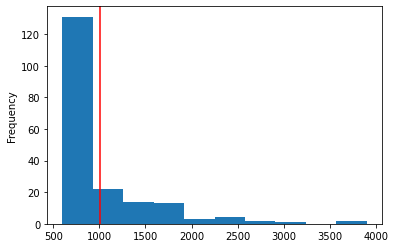

In [8]:
on_cycles = hvac_mode_changes[hvac_mode_changes.HVAC_mode == 0].time_delta
plt = on_cycles.plot.hist()
plt.axvline(x=on_cycles.mean(), color='r')
print("total runtime (s): {}".format(on_cycles.sum()))
print("mean HVAC on-cycle length (s): {}".format(on_cycles.mean()))